# **Example Design: Self-Driving Cab**




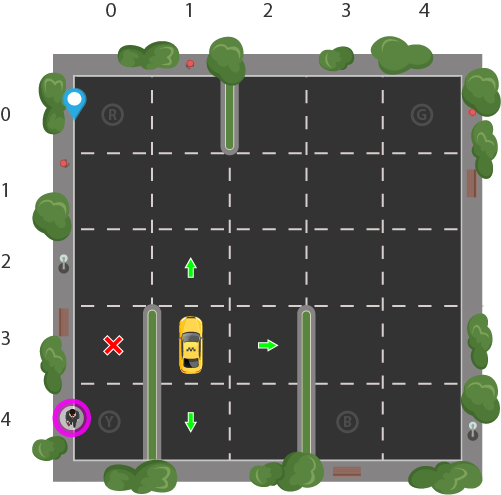

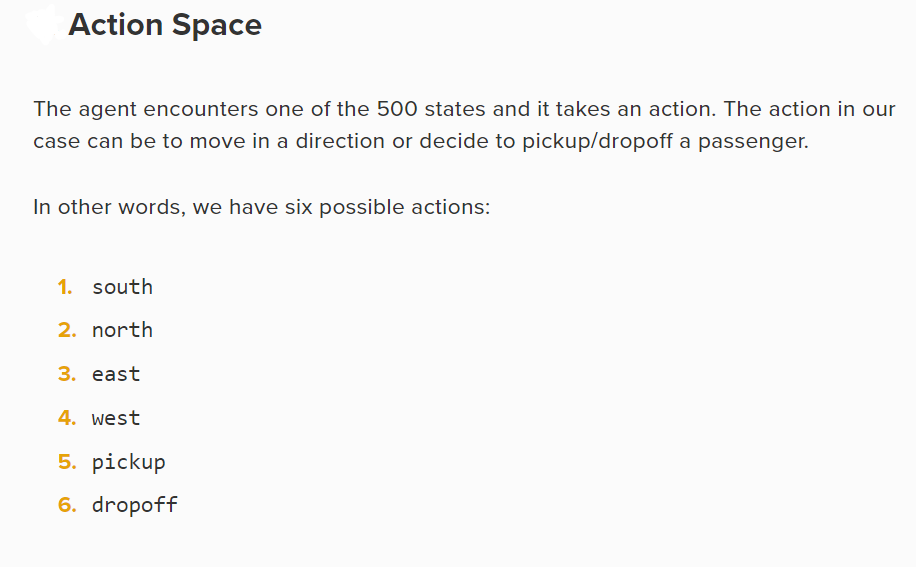

In [ ]:
!pip install cmake 'gym[atari]' scipy


In [11]:
import gym
env = gym.make("Taxi-v3").env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [60]:
state = env.reset() # reset environment to a new, random state
env.render()
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))
print(state)
print(env.decode(state)) #to do print state readings

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)
454


In [63]:
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)
env.s = state
env.render()
print(env)

State: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

<TaxiEnv<Taxi-v3>>


In [42]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])
print(q_table)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [64]:
%%time
"""Training the agent"""
import random
from IPython.display import clear_output
# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1
# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()
    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values
        next_state, reward, done, info = env.step(action) #explain more
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value
        if reward == -10:
            penalties += 1
        state = next_state
        epochs += 1
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.

CPU times: user 1min 5s, sys: 9.47 s, total: 1min 15s
Wall time: 1min 11s


In [72]:
q_table[333]

array([-2.44921391, -2.41837066, -2.41837066, -2.4370284 , -7.29279073,
       -9.46730236])

In [66]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100
frames1 = [] # for animation
for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    done = False
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        if reward == -10:
            penalties += 1
        # Put each rendered frame into dict for animation
        frames1.append({
            'frame': env.render(mode='ansi'),
            'state': state,
            'action': action,
            'reward': reward
            }
        )

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 12.38
Average penalties per episode: 0.0


In [ ]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.9)
        
print_frames(frames1)

Streaming output truncated to the last 5000 lines.
|Y| : |B: |
+---------+
  (West)

Timestep: 854
State: 216
Action: 3
Reward: -1
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Timestep: 855
State: 116
Action: 1
Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Timestep: 856
State: 16
Action: 1
Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 857
State: 0
Action: 5
Reward: 20
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Timestep: 858
State: 74
Action: 2
Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Timestep: 859
State: 174
Action: 0
Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Timestep: 860
State: 274
Action: 0
Reward: -1
+---------+
|R: | : :G|
| 